In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow
import keras
from tensorflow.keras.layers import Dense, Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import  fashion_mnist

(6000, 28, 28)

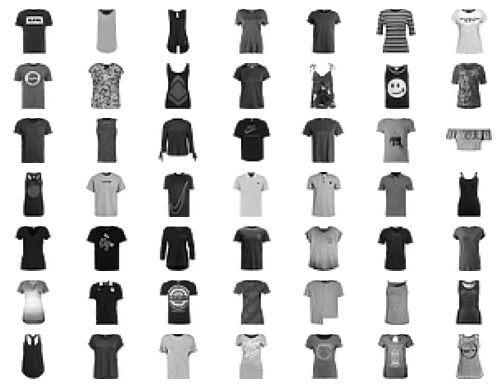

In [2]:
def cargar_imagenes():
    (Xtrain, Ytrain), (_, _) = fashion_mnist.load_data()

    # Nos quedamos con las camiseta
    indice = np.where(Ytrain == 0)
    indice = indice[0]
    Xtrain = Xtrain[indice, :,:]
    # Normalizamos los datos
    X = Xtrain.astype('float32') / 255.0
    return X

dataset = cargar_imagenes()

for i in range(49):
  plt.subplot(7, 7, 1 + i)
  plt.axis('off')
  plt.imshow(dataset[i], cmap="binary")

dataset.shape

In [3]:
print("Discriminador:")
discriminador = Sequential()
discriminador.add(Conv2D(8, kernel_size=3, padding="same",
                         input_shape=(dataset.shape[1],dataset.shape[2],1), activation="relu"))
discriminador.add(MaxPool2D((2,2)))

discriminador.add(Conv2D(32,kernel_size=3,padding="same",activation="relu"))
discriminador.add(MaxPool2D((2,2)))

discriminador.add(Conv2D(64,kernel_size=3,padding="same",activation="relu"))
discriminador.add(MaxPool2D((2,2)))

discriminador.add(Flatten())
discriminador.add(Dense(32,activation="relu"))
discriminador.add(Dense(1,activation="sigmoid"))

discriminador.summary()

Discriminador:


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,409 (153.94 KB)

 Trainable params: 39,409 (153.94 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
discriminador.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.00001), metrics=["accuracy"])

In [5]:
discriminador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,409 (153.94 KB)

 Trainable params: 39,409 (153.94 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
print("Generador:")
generador = Sequential()
generador.add(Dense(32,input_shape=(1,),activation="relu"))
generador.add(Dense(576,activation="relu"))
generador.add(Reshape((3,3,64)))

# Por cada batch hace un repaso y normaliza los datos
generador.add(BatchNormalization())
generador.add(Conv2DTranspose(64,kernel_size=3, strides=2,padding="valid",activation="relu"))

generador.add(BatchNormalization())
generador.add(Conv2DTranspose(32,kernel_size=3, strides=2,padding="same",activation="relu"))

generador.add(BatchNormalization())
generador.add(Conv2DTranspose(8,kernel_size=3, strides=2,padding="same",activation="relu"))

generador.add(BatchNormalization())

# Borra la mitad de las neuronas de vez en cuando
generador.add(Dropout(0.5))

generador.add(Conv2DTranspose(1,kernel_size=3,strides=1,padding="same",activation="sigmoid"))

generador.summary()

Generador:


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 576)            │        19,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 8)      │         2,312 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │            73 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,521 (302.82 KB)

 Trainable params: 77,185 (301.50 KB)

 Non-trainable params: 336 (1.31 KB)

In [7]:
print("Gan:")
gan = Sequential()
gan.add(generador)
gan.add(discriminador)
gan.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.00001), metrics=["accuracy"])
gan.summary()

Gan:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │        77,521 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │        39,409 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,930 (456.76 KB)

 Trainable params: 116,594 (455.45 KB)

 Non-trainable params: 336 (1.31 KB)

In [8]:
def get_datos_true(nmuestras):
    ix = np.random.randint(0,dataset.shape[0],nmuestras)
    X = dataset[ix]
    y = np.ones((nmuestras,1))
    return X, y

def get_datos_fake(nmuestras):
    input = np.random.rand(nmuestras)
    X = np.squeeze(generador.predict(input))
    y = np.zeros((nmuestras,1))
    return X, y

def entrenamiento(epochs=1, batch_size=128):
    max_len = dataset.shape[0]
    nbatchs = int(max_len // batch_size)
    acc_r,acc_f,acc_g=[],[],[]
    for epoch in range(epochs):
        print("Epoch : ", epoch)
        for batch in range(nbatchs):
            # entrenar discriminador
            acc_real = 0.0
            discriminador.trainable = True

            while acc_real < 0.1:
                X_real,y_real = get_datos_true(batch_size//2)
                # Permite entrenar a cachos el discriminador
                loss_real, acc_real = discriminador.train_on_batch(X_real,y_real)

            acc_fake=0.0
            while acc_fake < 0.1:
                X_fake,y_fake = get_datos_fake(batch_size//2)
                # Permite entrenar a cachos el discriminador
                loss_fake, acc_fake = discriminador.train_on_batch(X_fake,y_fake)

            discriminador.trainable = False

            # entrenar generador (a través de la gan completa)
            X_gan = np.random.randn(batch_size).reshape(batch_size, 1)
            y_gan = np.ones((batch_size,1))

            acc_gan,indice = 0.0,0
            while acc_gan < 0.1:
                if indice==40: break
                loss_gan, acc_gan, _, _ = gan.train_on_batch(X_gan,y_gan)
                indice+=1 # Por si se queda en el bucle indefinidamente

            print(f"Epoch: {epoch} - Batch: {batch}")
            print(f"loss_real: {loss_real} - loss_fake: {loss_fake} - loss_gan: {loss_gan}")
            print(f"acc_real: {acc_real} - acc_fake: {acc_fake} - acc_gan: {acc_gan}")
            acc_r.append(acc_real)
            acc_f.append(acc_fake)
            acc_g.append(acc_gan)

    return acc_r,acc_f,acc_g

In [9]:
values = entrenamiento(epochs=3,batch_size=32)

Epoch :  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Epoch: 0 - Batch: 0
loss_real: 0.6491686105728149 - loss_fake: 0.6758862733840942 - loss_gan: 0.6758862733840942
acc_real: 1.0 - acc_fake: 0.5 - acc_gan: 0.6758862733840942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch: 0 - Batch: 1
loss_real: 0.6670970916748047 - loss_fake: 0.6759864687919617 - loss_gan: 0.6759864687919617
acc_real: 0.6666666865348816 - acc_fake: 0.5 - acc_gan: 0.6759864687919617
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch: 0 - Batch: 2
loss_real: 0.6701894998550415 - loss_fake: 0.6755967140197754 - loss_gan: 0.6755967140197754
acc_real: 0.6000000238418579 - acc_fake: 0.5 - acc_gan: 0.6755967140197754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch: 0 - Batch: 3
loss_real: 0.6712793111801147 - loss_fake: 0.6751956939697266 - loss_gan: 0.6751956939697266
acc_real: 0.5714285969734192 - acc_fake: 0.5 - acc_gan: 0.6751956939697266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch: 0 - Batch: 4
loss_real: 0.6726130247116089 - loss_fake

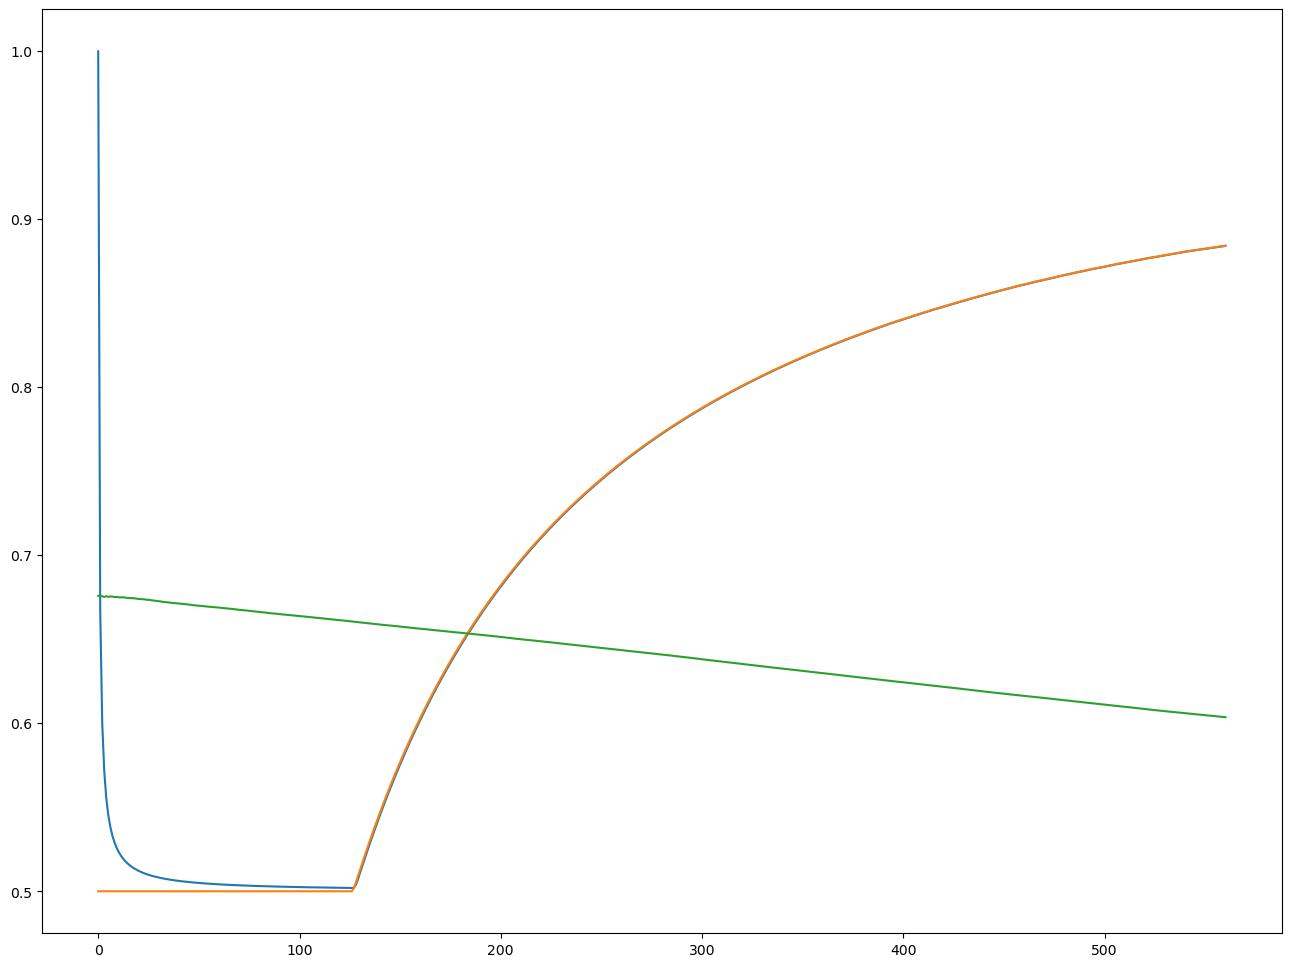

In [10]:
plt.figure(figsize=(16, 12))

plt.plot(values[0])
plt.plot(values[1])
plt.plot(values[2])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


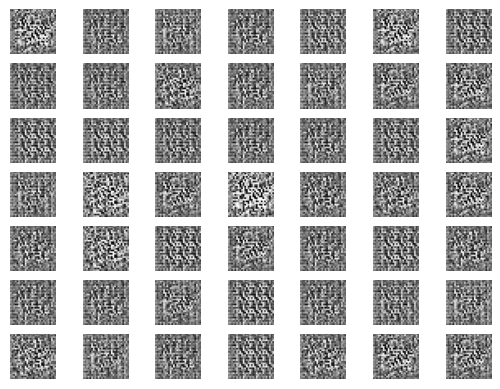

In [11]:
X_pru = np.random.randn(49)
generadas = generador.predict(X_pru)
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.axis('off')
  plt.imshow(generadas[i], cmap="binary")
plt.show()

In [12]:
gan.save("archives/gan.keras")